## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data 
#### 2. Data cleaning
#### 3. The elbow technique
#### 4. k-means clustering
#### 5. Insights

### 1. Importing libraries and data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import warnings
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Ignore FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)

# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# Set path
path = r'C:\Users\gered\OneDrive\Desktop\Boat Sales 01.24.A6\Boat Sales 23.01.24'

In [4]:
# Import Data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boats_relations.csv'), index_col = False)

In [5]:
df.shape

(9301, 13)

In [6]:
df.head()

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Last 7 days views,Country,Price in EUR,Size,Price category
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,none,226,Switzerland,3537,7.600,Low price
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,Germany,3490,6.000,Low price
2,2,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,none,64,Denmark,3367,3.000,Low price
3,3,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,Germany,3399,5.183,Low price
4,4,Catamaran,none,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,Switzerland,3816,14.756,Low price


### 2. Data cleaning
###### Dropping and renaming columns

In [7]:
# Dropping columns Unnamed:0 (ID), Length, Width and index

df = df.drop(['Unnamed: 0', 'Length', 'Width'], axis=1)
df.reset_index(drop=True, inplace=True)

In [8]:
# Rename columns for better understanding
df.rename(columns={'Type': 'UsageType'}, inplace=True)

In [9]:
# Check unique values in the 'Country' column
unique_countries = df['Country'].unique()

# Print unique values
print(unique_countries)


['Switzerland' 'Germany' 'Denmark' 'Italy' 'France' 'United Kingdom'
 'Spain' 'Austria' 'Netherlands' 'Slovenia' 'Serbia' 'Belgium'
 'Slovak Republic' 'Croatia (Hrvatska)' 'Portugal' 'Malta' 'Montenegro'
 'Rovinij' 'Steinwiesen' 'Greece' 'Rolle' 'Poland' 'baden baden' 'Donau'
 'TravemÃ¼nde' 'Lake Constance' 'Turkey' 'Stralsund' 'Rostock'
 'Lake Geneva' 'Split' 'Finland' 'lago maggiore' 'BelgiÃ«, Zulte'
 'Hungary' 'Brandenburg an derHavel' 'RÃ¼gen' 'Zevenbergen' 'Oder'
 'Cyprus' 'Faoug' 'Beilngries' 'Sweden' 'Lithuania' 'United States'
 'Marina Punat' 'Ukraine' 'French Southern Territories' 'Italien'
 'Brandenburg' 'Estonia' 'Monaco' 'Russian Federation' 'waren mÃ¼ritz'
 'Egypt' 'Jersey' 'United Arab Emirates' 'Australia' 'Bulgaria'
 'Philippines' 'Taiwan' 'Thailand' 'Luxembourg' 'Venezuela' 'Latvia'
 'Neustadt in Holstein (Ostsee)' 'Ireland' 'Adria' 'Martinique' 'Norway'
 'Seychelles' 'Morocco' 'Gibraltar' 'Lebanon' 'Czech Republic' 'Ostsee'
 'Mallorca' 'Greetsile/ KrummhÃ¶rn' 'annecy'

In [10]:
# use the unidecode library to address unreadable characters.

from unidecode import unidecode

df['Country'] = df['Country'].apply(unidecode)

# List of valid countries
valid_countries = ['Switzerland', 'Germany', 'Denmark', 'Italy', 'France', 'United Kingdom',
                   'Spain', 'Austria', 'Netherlands', 'Slovenia', 'Serbia', 'Belgium',
                   'Slovak Republic', 'Croatia (Hrvatska)', 'Portugal', 'Malta', 'Montenegro',
                   'Greece', 'Poland', 'Turkey', 'Finland', 'Hungary', 'Cyprus', 'Sweden',
                   'Lithuania', 'United States', 'Ukraine', 'Estonia', 'Monaco', 'Russian Federation',
                   'Egypt', 'United Arab Emirates', 'Australia', 'Bulgaria', 'Philippines', 'Taiwan',
                   'Thailand', 'Luxembourg', 'Venezuela', 'Latvia', 'Ireland', 'Norway', 'Morocco',
                   'Lebanon', 'Czech Republic', 'Isle of Man', 'Romania']

# Filter the DataFrame to keep only valid countries
df = df[df['Country'].isin(valid_countries)]

# Check unique values in the 'Country' column again
unique_countries = df['Country'].unique()

# Print unique values
print(unique_countries)

['Switzerland' 'Germany' 'Denmark' 'Italy' 'France' 'United Kingdom'
 'Spain' 'Austria' 'Netherlands' 'Slovenia' 'Serbia' 'Belgium'
 'Slovak Republic' 'Croatia (Hrvatska)' 'Portugal' 'Malta' 'Montenegro'
 'Greece' 'Poland' 'Turkey' 'Finland' 'Hungary' 'Cyprus' 'Sweden'
 'Lithuania' 'United States' 'Ukraine' 'Estonia' 'Monaco'
 'Russian Federation' 'Egypt' 'United Arab Emirates' 'Australia'
 'Bulgaria' 'Philippines' 'Taiwan' 'Thailand' 'Luxembourg' 'Venezuela'
 'Latvia' 'Ireland' 'Norway' 'Morocco' 'Lebanon' 'Czech Republic'
 'Isle of Man' 'Romania']


##### checking changes

In [11]:
df.head()

,Boat Type,Manufacturer,UsageType,Year Built,Material,Last 7 days views,Country,Price in EUR,Size,Price category
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,none,226,Switzerland,3537,7.600,Low price
1,Center console boat,Terhi power boats,new boat from stock,2020,Thermoplastic,75,Germany,3490,6.000,Low price
2,Sport Boat,Pioner power boats,new boat from stock,2020,none,64,Denmark,3367,3.000,Low price
3,Fishing Boat,Linder power boats,new boat from stock,2019,Aluminium,58,Germany,3399,5.183,Low price
4,Catamaran,none,"Used boat,Unleaded",1999,Aluminium,474,Switzerland,3816,14.756,Low price


In [15]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 9209 entries, 0 to 9300
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Boat Type          9209 non-null   object 
 1   Manufacturer       9209 non-null   object 
 2   UsageType          9209 non-null   object 
 3   Year Built         9209 non-null   int64  
 4   Material           9209 non-null   object 
 5   Last 7 days views  9209 non-null   int64  
 6   Country            9209 non-null   object 
 7   Price in EUR       9209 non-null   int64  
 8   Size               9209 non-null   float64
 9   Price category     9209 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 791.4+ KB


### 3. The elbow technique

In [16]:
# Select variables of interest
Var_num = ['Size', 'Year Built', 'Price in EUR', 'Last 7 days views']

# Create a new DataFrame with only the selected variables
selected_df = df[Var_num]

# Display the new DataFrame
print(selected_df)


         Size  Year Built  Price in EUR  Last 7 days views
0      7.6000        2017          3537                226
1      6.0000        2020          3490                 75
2      3.0000        2020          3367                 64
3      5.1830        2019          3399                 58
4     14.7560        1999          3816                474
...       ...         ...           ...                ...
9296   9.7200        1984          5247                288
9297  15.3720        1987          5194               1116
9298   7.9200        2020          4499                354
9299   8.2593        2018          4300                266
9300   5.7600        2019          4006                194

[9209 rows x 4 columns]


In [18]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [20]:
score = [kmeans[i].fit(selected_df).score(selected_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-8208993029722002.0,
 -3369284347351038.5,
 -1942061704186996.5,
 -1103213561473049.9,
 -752080230735804.2,
 -514860170941705.2,
 -366577867899035.44,
 -274790379585690.53,
 -213933293016778.94]

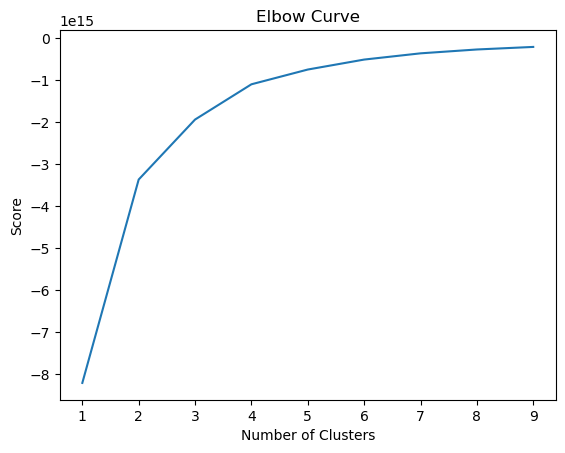

In [21]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three , and four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is four.

### 4. k-means clustering


In [27]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [28]:
# Fit the k-means object to the data.

kmeans.fit(selected_df)

KMeans(n_clusters=4)

In [29]:
selected_df['clusters'] = kmeans.fit_predict(selected_df)

C:\Users\gered\AppData\Local\Temp\ipykernel_21212\660129805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['clusters'] = kmeans.fit_predict(selected_df)


In [26]:
selected_df.head(30)

,Size,Year Built,Price in EUR,Last 7 days views,clusters
0,7.6000,2017,3537,226,0
1,6.0000,2020,3490,75,0
2,3.0000,2020,3367,64,0
3,5.1830,2019,3399,58,0
4,14.7560,1999,3816,474,0
5,4.9868,2019,3333,45,0
6,7.5255,2018,3300,180,0
7,7.6125,1987,3710,239,0
8,9.4000,2004,3500,69,0
9,7.2600,2020,4876,113,0


In [31]:
selected_df['clusters'].value_counts()

clusters
0    8750
1     384
3      67
2       8
Name: count, dtype: int64

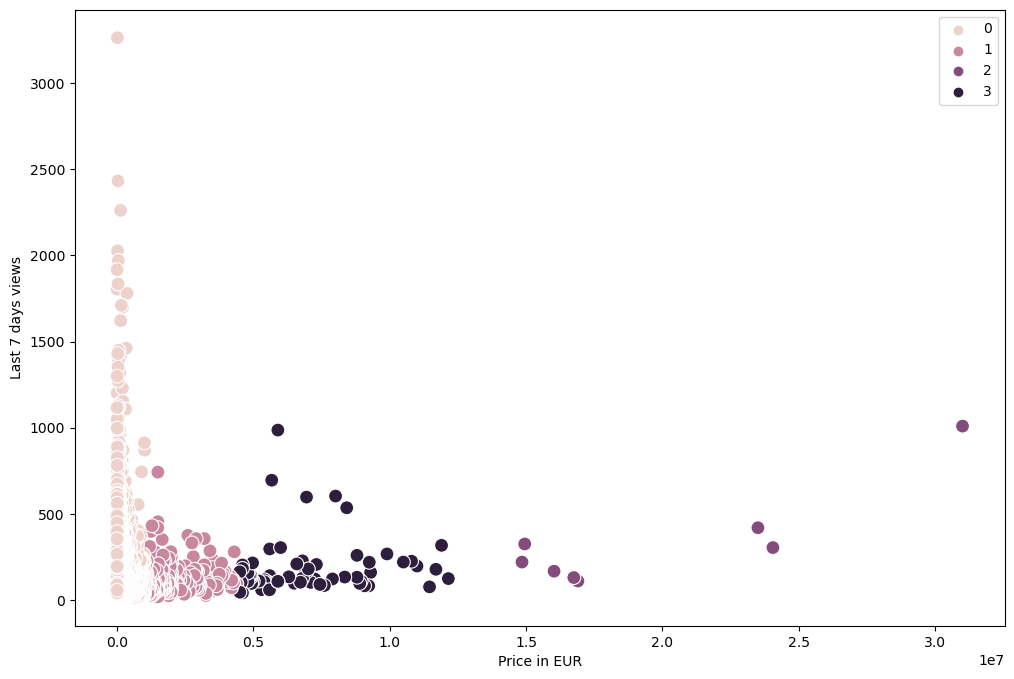

In [32]:
# Plot the clusters for the "Last 7 days views" and "Price in EUR" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Price in EUR'], y=df['Last 7 days views'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price in EUR') # Label x-axis.
plt.ylabel('Last 7 days views') # Label y-axis.
plt.show()

###### Cluster 0 suggests a popular segment of affordable boats, while Clusters 2 and 3 highlight high-priced boats with varying levels of popularity.

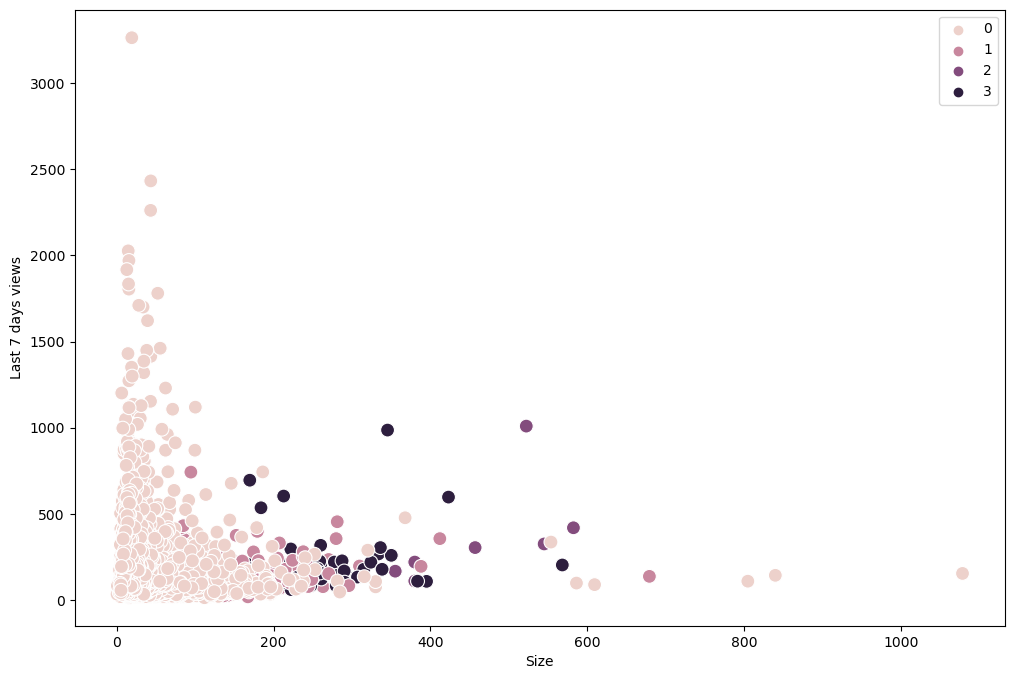

In [33]:
# Plot the clusters for the "Size" and "Last 7 days views" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Size'], y=df['Last 7 days views'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Size') 
plt.ylabel('Last 7 days views') 
plt.show()

##### The prominence of Cluster 0 in the smaller to medium size range indicates a segment of boats that are both small to medium in size and highly viewed.
##### While Cluster 0 still appears in larger sizes, the presence of other clusters in that range suggests a diversity of boats with varying popularity.

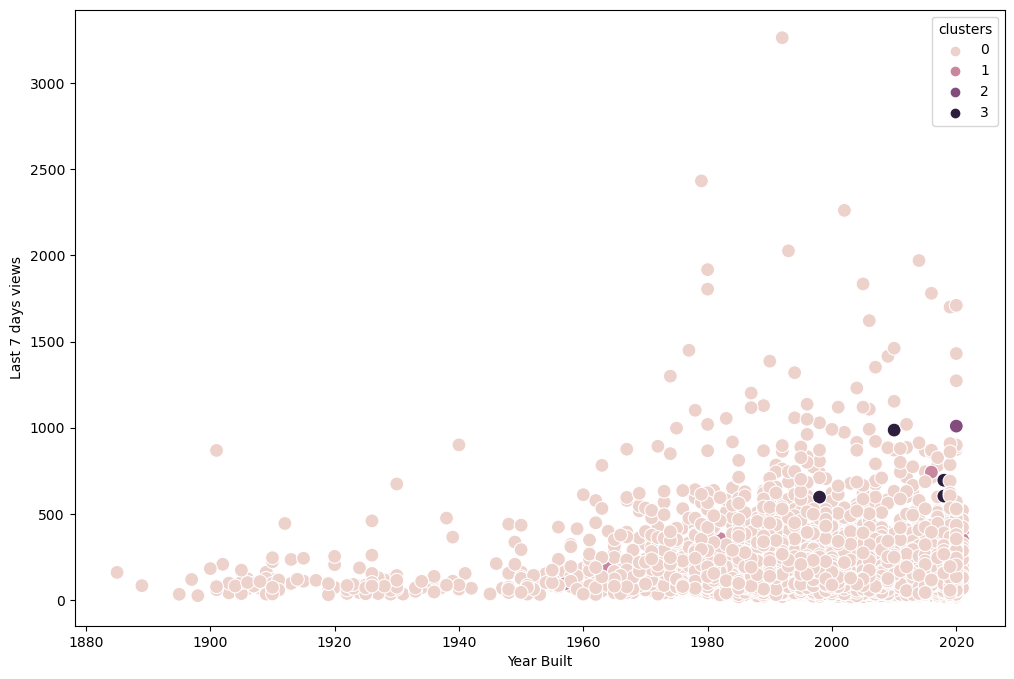

In [35]:
# Plot the clusters for the "Year Built" and "Last 7 days views" variables.

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x=selected_df['Year Built'], y=selected_df['Last 7 days views'], hue=selected_df['clusters'], s=100)

ax.grid(False) 
plt.xlabel('Year Built') 
plt.ylabel('Last 7 days views') 
plt.show()

##### The concentration of views in recent years may indicate a trend where newer boats are more popular among users.

#### the loc function has also been used to relabel the clusters from numbers to color names, making them easier to work with.

In [39]:
selected_df.loc[selected_df['clusters'] == 3, 'cluster'] = 'dark purple'
selected_df.loc[selected_df['clusters'] == 1, 'cluster'] = 'dark pink'
selected_df.loc[selected_df['clusters'] == 0, 'cluster'] = 'pink'
selected_df.loc[selected_df['clusters'] == 2, 'cluster'] = 'purple'

##### descriptive analysis to check each of the individual statistics by groupby() function

In [40]:
selected_df.groupby('cluster').agg({'Year Built':['mean', 'median'], 
                         'Last 7 days views':['mean', 'median'], 
                         'Size':['mean', 'median'],
                          'Price in EUR':['mean', 'median']})

Year Built         Last 7 days views               Size  \
                    mean  median              mean median        mean   
cluster                                                                 
dark pink    2012.393229  2013.0        109.119792   90.5  135.862792   
dark purple  2014.089552  2016.0        183.835821  132.0  244.879563   
pink         2004.549943  2007.0        148.838171  108.0   42.360694   
purple       2014.375000  2020.0        335.500000  262.0  439.001250   

                        Price in EUR              
                median          mean      median  
cluster                                           
dark pink    123.67565  1.898227e+06   1655048.0  
dark purple  227.33000  6.926056e+06   6500000.0  
pink          33.66000  1.664207e+05     89000.0  
purple       418.48000  1.975312e+07  16825000.0

### 5. Insights

##### "Dark Purple" exhibits higher popularity, larger size, and a higher price range compared to "Dark Pink."
##### Pink cluster remains diverse, representing a mix of older and smaller boats with moderate popularity and a more affordable price range.
##### Boats in the "Purple" cluster continue to show high popularity, larger sizes, and higher prices.

#### These insights can further guide decision-making, such as refining marketing strategies for different boat segments or adjusting inventory based on customer preferences.

In [41]:
# Export Data frame
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'boats_clustered.csv'))